In [175]:
from functions import get_energy,get_DAX,merge_submissions,check_submission
from functions.prepare_data import split_time
from functions.evaluation import evaluate_horizon
from tqdm import tqdm
from functions import evaluate_energy
from models.energy.energy_models import energy_baseline,energy_LSTM, energy_XGBoost, energy_quantile_regression

In [2]:
# Load data
energydata= get_energy.get()

  0%|          | 0/274 [00:00<?, ?it/s]/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/functions/get_energy.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  energydata = pd.concat([energydata, pd.DataFrame(rawdata, columns=col_names)])
100%|██████████| 274/274 [00:30<00:00,  9.09it/s]


In [33]:
energydata

,gesamt,weekday
date_time,,
2018-12-24 00:00:00+01:00,42.02925,0
2018-12-24 01:00:00+01:00,39.61025,0
2018-12-24 02:00:00+01:00,39.13875,0
2018-12-24 03:00:00+01:00,39.42100,0
2018-12-24 04:00:00+01:00,40.74775,0
...,...,...
2024-03-18 11:00:00+01:00,65.05950,0
2024-03-18 12:00:00+01:00,64.95550,0
2024-03-18 13:00:00+01:00,63.52025,0


In [3]:
# get mean gesamt of energy data by weekday
energydata.groupby('weekday').mean()

,gesamt
weekday,
0,57.018630
1,58.818291
2,58.937657
3,58.671360
4,57.528987
5,50.051928
6,46.875149


In [4]:
Regression_model = {
    'name': 'Energy QuantReg',
    'function': energy_quantile_regression
}
XGB_model = {
    'name': 'XGBoost',
    'function': energy_XGBoost
}
baseline_model = {
    'name': 'Baseline',
    'function': energy_baseline
}
LSTM_model = {
    'name': 'LSTM',
    'function': energy_LSTM
}



/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5276
Model:                       QuantReg   Bandwidth:                      0.7852
Method:                 Least Squares   Sparsity:                        11.61
Date:                Mon, 18 Mar 2024   No. Observations:                27304
Time:                        18:01:17   Df Residuals:                    27268
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.9149      0.206    290.529      0.000      59.511      60.319
weekday       -1.8724      0.018   -106.646      0.000      -1.907      -1.838
month_2       -0.0659      0.166     -0.398      0.691      -0.391       0.259
month_3       -3.6088      0.162    -22.256      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5286
Model:                       QuantReg   Bandwidth:                      0.7820
Method:                 Least Squares   Sparsity:                        11.60
Date:                Mon, 18 Mar 2024   No. Observations:                27472
Time:                        18:01:34   Df Residuals:                    27436
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8912      0.206    291.188      0.000      59.488      60.294
weekday       -1.8694      0.017   -106.844      0.000      -1.904      -1.835
month_2        0.0462      0.162      0.286      0.775      -0.271       0.364
month_3       -3.6196      0.162    -22.333      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5294
Model:                       QuantReg   Bandwidth:                      0.7793
Method:                 Least Squares   Sparsity:                        11.56
Date:                Mon, 18 Mar 2024   No. Observations:                27640
Time:                        18:01:45   Df Residuals:                    27604
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8777      0.204    292.955      0.000      59.477      60.278
weekday       -1.8626      0.017   -107.214      0.000      -1.897      -1.829
month_2        0.1245      0.158      0.788      0.431      -0.185       0.434
month_3       -3.6339      0.161    -22.512      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5304
Model:                       QuantReg   Bandwidth:                      0.7770
Method:                 Least Squares   Sparsity:                        11.56
Date:                Mon, 18 Mar 2024   No. Observations:                27808
Time:                        18:02:02   Df Residuals:                    27772
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8796      0.204    293.472      0.000      59.480      60.280
weekday       -1.8636      0.017   -107.543      0.000      -1.898      -1.830
month_2        0.1162      0.155      0.748      0.454      -0.188       0.421
month_3       -3.6393      0.162    -22.534      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying 

Epoch 1/10


2024-03-18 18:02:50.493561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-18 18:02:50.494719: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-18 18:02:50.495404: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

304/304 - 4s - loss: 0.8461 - val_loss: 0.8415 - 4s/epoch - 14ms/step
Epoch 2/10
304/304 - 2s - loss: 0.8335 - val_loss: 0.8320 - 2s/epoch - 6ms/step
Epoch 3/10
304/304 - 2s - loss: 0.8196 - val_loss: 0.8201 - 2s/epoch - 6ms/step
Epoch 4/10
304/304 - 2s - loss: 0.8076 - val_loss: 0.8212 - 2s/epoch - 6ms/step
Epoch 5/10
304/304 - 2s - loss: 0.8028 - val_loss: 0.8179 - 2s/epoch - 6ms/step
Epoch 6/10
304/304 - 2s - loss: 0.7982 - val_loss: 0.8145 - 2s/epoch - 6ms/step
Epoch 7/10
304/304 - 2s - loss: 0.7943 - val_loss: 0.8114 - 2s/epoch - 6ms/step
Epoch 8/10
304/304 - 2s - loss: 0.7913 - val_loss: 0.8083 - 2s/epoch - 6ms/step
Epoch 9/10
304/304 - 2s - loss: 0.7888 - val_loss: 0.8061 - 2s/epoch - 7ms/step
Epoch 10/10
304/304 - 2s - loss: 0.7869 - val_loss: 0.8042 - 2s/epoch - 7ms/step


2024-03-18 18:03:11.857891: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-18 18:03:11.858889: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-18 18:03:11.859542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 419ms/step
Epoch 1/10


2024-03-18 18:03:12.245215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-18 18:03:12.245855: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-18 18:03:12.246760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

306/306 - 4s - loss: 0.8460 - val_loss: 0.8446 - 4s/epoch - 13ms/step
Epoch 2/10
306/306 - 2s - loss: 0.8333 - val_loss: 0.8323 - 2s/epoch - 7ms/step
Epoch 3/10
306/306 - 2s - loss: 0.8179 - val_loss: 0.8190 - 2s/epoch - 7ms/step
Epoch 4/10
306/306 - 2s - loss: 0.8077 - val_loss: 0.8210 - 2s/epoch - 7ms/step
Epoch 5/10
306/306 - 2s - loss: 0.8037 - val_loss: 0.8169 - 2s/epoch - 7ms/step
Epoch 6/10
306/306 - 2s - loss: 0.7996 - val_loss: 0.8119 - 2s/epoch - 7ms/step
Epoch 7/10
306/306 - 2s - loss: 0.7961 - val_loss: 0.8084 - 2s/epoch - 8ms/step
Epoch 8/10
306/306 - 2s - loss: 0.7933 - val_loss: 0.8047 - 2s/epoch - 6ms/step
Epoch 9/10
306/306 - 2s - loss: 0.7907 - val_loss: 0.8020 - 2s/epoch - 5ms/step
Epoch 10/10
306/306 - 2s - loss: 0.7887 - val_loss: 0.8005 - 2s/epoch - 5ms/step


2024-03-18 18:03:34.468678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-18 18:03:34.469551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-18 18:03:34.470322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 373ms/step
Epoch 1/10


2024-03-18 18:03:35.141054: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-18 18:03:35.141758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-18 18:03:35.142747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

307/307 - 4s - loss: 0.8462 - val_loss: 0.8455 - 4s/epoch - 12ms/step
Epoch 2/10
307/307 - 2s - loss: 0.8343 - val_loss: 0.8338 - 2s/epoch - 5ms/step
Epoch 3/10
307/307 - 2s - loss: 0.8199 - val_loss: 0.8213 - 2s/epoch - 5ms/step
Epoch 4/10
307/307 - 2s - loss: 0.8093 - val_loss: 0.8236 - 2s/epoch - 6ms/step
Epoch 5/10
307/307 - 2s - loss: 0.8046 - val_loss: 0.8186 - 2s/epoch - 6ms/step
Epoch 6/10
307/307 - 2s - loss: 0.8000 - val_loss: 0.8136 - 2s/epoch - 6ms/step
Epoch 7/10
307/307 - 2s - loss: 0.7961 - val_loss: 0.8092 - 2s/epoch - 6ms/step
Epoch 8/10
307/307 - 2s - loss: 0.7929 - val_loss: 0.8055 - 2s/epoch - 5ms/step
Epoch 9/10
307/307 - 2s - loss: 0.7904 - val_loss: 0.8028 - 2s/epoch - 5ms/step
Epoch 10/10
307/307 - 2s - loss: 0.7885 - val_loss: 0.8007 - 2s/epoch - 6ms/step


2024-03-18 18:03:54.436559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-18 18:03:54.437578: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-18 18:03:54.438270: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 376ms/step
Epoch 1/10


2024-03-18 18:03:54.838675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-18 18:03:54.839542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-18 18:03:54.840192: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

309/309 - 4s - loss: 0.8456 - val_loss: 0.8470 - 4s/epoch - 13ms/step
Epoch 2/10
309/309 - 2s - loss: 0.8333 - val_loss: 0.8353 - 2s/epoch - 6ms/step
Epoch 3/10
309/309 - 2s - loss: 0.8194 - val_loss: 0.8201 - 2s/epoch - 6ms/step
Epoch 4/10
309/309 - 2s - loss: 0.8090 - val_loss: 0.8204 - 2s/epoch - 6ms/step
Epoch 5/10
309/309 - 2s - loss: 0.8040 - val_loss: 0.8156 - 2s/epoch - 6ms/step
Epoch 6/10
309/309 - 2s - loss: 0.7994 - val_loss: 0.8109 - 2s/epoch - 6ms/step
Epoch 7/10
309/309 - 2s - loss: 0.7953 - val_loss: 0.8069 - 2s/epoch - 6ms/step
Epoch 8/10
309/309 - 2s - loss: 0.7919 - val_loss: 0.8035 - 2s/epoch - 6ms/step
Epoch 9/10
309/309 - 2s - loss: 0.7892 - val_loss: 0.8015 - 2s/epoch - 6ms/step
Epoch 10/10
309/309 - 2s - loss: 0.7872 - val_loss: 0.7997 - 2s/epoch - 6ms/step


2024-03-18 18:04:15.575400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-18 18:04:15.576332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-18 18:04:15.577052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 366ms/step


/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldc

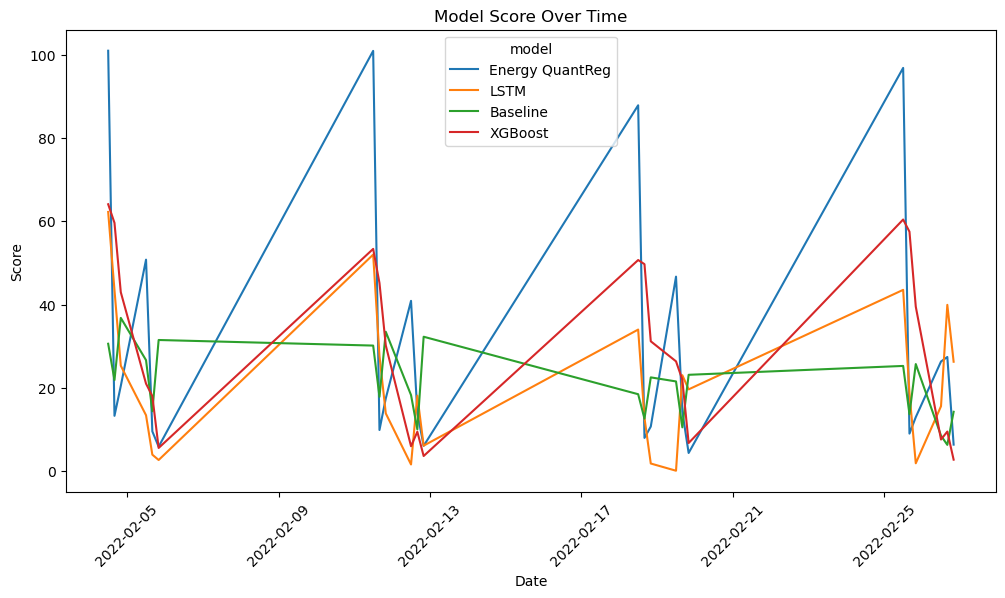

In [5]:
start_date = '2022-02-01'
end_date = '2022-03-01'

evaluations, grouped_scores = evaluate_energy.evaluate(Regression_model, XGB_model,baseline_model,LSTM_model, df=energydata, start_date= start_date, end_date= end_date, horizon_format="hours")

In [6]:
# sum of scores
grouped_scores

mean     median        std
model           horizon                                 
Baseline        36 hour  26.098833  27.688006   5.644324
                40 hour  16.473952  15.734656   4.238127
                44 hour  29.603917  29.569871   6.639115
                60 hour  18.719358  19.880491   7.645279
                64 hour  10.278257  10.243187   3.304555
                68 hour  25.266788  27.292204   8.445931
Energy QuantReg 36 hour  96.667819  98.904482   6.173494
                40 hour  10.006028   9.412529   2.301632
                44 hour  15.374570  15.191411   4.399229
                60 hour  41.165163  43.788697  10.707438
                64 hour  16.302160  14.150224   7.710177
                68 hour   5.632504   5.937176   0.894544
LSTM            36 hour  47.937728  47.760676  12.049594
                40 hour  25.626372  23.158517  13.360150
                44 hour  10.691392   7.840888  11.261805
                60 hour   7.641669   7.475119   7.959487
                64 hour  21.238718  20.558349  14.856008
                68 hour  13.645163  12.846974  11.147498
XGBoost         36 hour  57.143671  56.895221   6.190716
                40 hour  52.995418  53.599013   6.744217
                44 hour  35.943131  35.325551   6.269063
                60 hour  15.206998  14.271301  10.026205
                64 hour  14.709862  13.734675   6.284631
                68 hour   4.640772   4.563557   1.815871

In [7]:
# mean of scores by model
grouped_scores.groupby('model').mean()

,mean,median,std
model,,,
Baseline,21.073518,21.734736,5.986222
Energy QuantReg,30.858041,31.230753,5.364419
LSTM,21.130174,19.940087,11.772424
XGBoost,30.106642,29.731553,6.221784


In [8]:
for evaluation in evaluations:
    print(evaluation[['score','weekday']].groupby('weekday').sum())
    print(evaluation['score'].sum())

              score
weekday            
4        488.193666
5        252.399309
740.5929748604374
              score
weekday            
4        584.328881
5        138.230529
722.5594100036619
              score
weekday            
4        288.706808
5        217.057614
505.76442187499987
              score
weekday            
4        337.021967
5        170.102202
507.1241692657469


In [28]:
import pandas as pd

# Assuming you have a list of DataFrames named `predictions_list`
predictions_list = evaluations  # This will be your list of DataFrames as shown

# Define weights for each model's predictions
# These should sum up to 1. Adjust these based on your preference or model performance
weights = [1, 0, 0,0]

def create_ensemble(predictions_list, weights):
    # Ensure the list and weights have the same length
    assert len(predictions_list) == len(weights), "The number of predictions must match the number of weights."
    
    # Convert each DataFrame's score to a weighted score
    weighted_scores = [df['score'] * weight for df, weight in zip(predictions_list, weights)]
    
    # Combine the weighted scores into a single DataFrame
    combined_scores = pd.concat(weighted_scores, axis=1)
    
    # Sum the weighted scores row-wise to get the final ensemble score
    ensemble_score = combined_scores.sum(axis=1)
    
    # Create a new DataFrame for the ensemble result
    ensemble_df = predictions_list[0].copy()
    ensemble_df['ensemble_score'] = ensemble_score
    
    # Optionally, drop other score columns if they are no longer needed
    # ensemble_df = ensemble_df[['forecast_date', 'target', 'horizon', 'ensemble_score', ...]]
    
    return ensemble_df

# Create the ensemble
ensemble_df = create_ensemble(predictions_list, weights)

# Display the ensemble DataFrame
print(ensemble_df.head())


  forecast_date  target  horizon     q0.025      q0.25       q0.5      q0.75  \
0    2022-02-03  energy  36 hour  40.025502  48.380315  52.425257   55.05325   
1    2022-02-03  energy  40 hour  51.148251  61.501999  65.487005   70.10775   
2    2022-02-03  energy  44 hour   50.02725  57.638251  60.318325  63.516001   
3    2022-02-03  energy  60 hour  39.033502  46.368065  50.552842   53.74025   
4    2022-02-03  energy  64 hour  50.156251  59.489749   63.61459   68.79475   

      q0.975      actual_forecast_date    gesamt  weekday       score  \
0   57.79041 2022-02-04 12:00:00+01:00  74.97500        4  100.987137   
1  74.568205 2022-02-04 16:00:00+01:00  71.16125        4   13.255118   
2  66.703303 2022-02-04 20:00:00+01:00  67.48525        4   20.441995   
3  57.003258 2022-02-05 12:00:00+01:00  63.64675        5   50.778473   
4  73.781053 2022-02-05 16:00:00+01:00  59.93250        5    9.515831   

             model  ensemble_score  
0  Energy QuantReg      100.987137  
1  Ene

In [30]:
ensemble_df['ensemble_score'].sum()

740.5929748604374

In [61]:
evaluations[2]

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,gesamt,weekday,score,model
0,2022-02-03,energy,36 hour,48.542912,62.543813,65.020375,69.024938,72.844075,2022-02-04 12:00:00+01:00,74.97500,4,30.572221,Baseline
1,2022-02-03,energy,40 hour,51.211075,58.527188,61.642375,67.916687,74.133250,2022-02-04 16:00:00+01:00,71.16125,4,21.848859,Baseline
2,2022-02-03,energy,44 hour,48.136700,52.769562,56.125250,60.040875,64.442612,2022-02-04 20:00:00+01:00,67.48525,4,36.784977,Baseline
3,2022-02-03,energy,60 hour,49.717100,52.258938,54.318375,57.881250,62.486231,2022-02-05 12:00:00+01:00,63.64675,5,26.630025,Baseline
4,2022-02-03,energy,64 hour,47.565687,50.608375,53.194750,58.567063,65.662856,2022-02-05 16:00:00+01:00,59.93250,5,14.352827,Baseline
5,2022-02-03,energy,68 hour,44.750369,47.516250,50.120000,53.582563,57.839637,2022-02-05 20:00:00+01:00,60.15025,5,31.474470,Baseline
0,2022-02-10,energy,36 hour,48.542912,62.543813,65.020375,69.024938,73.006719,2022-02-11 12:00:00+01:00,74.95075,4,30.133815,Baseline
1,2022-02-10,energy,40 hour,51.211075,58.527188,61.642375,68.012687,74.133250,2022-02-11 16:00:00+01:00,69.86725,4,17.822859,Baseline
2,2022-02-10,energy,44 hour,48.136700,52.769562,56.125250,60.060812,64.600431,2022-02-11 20:00:00+01:00,66.88525,4,33.447324,Baseline
3,2022-02-10,energy,60 hour,49.717100,52.258938,54.318375,57.939750,62.486231,2022-02-12 12:00:00+01:00,61.65400,5,18.242988,Baseline


In [41]:
from functions import naive_ensemble

In [68]:
def ensemble(df_models, weights):
    """
    Combine forecasts from multiple models into an ensemble forecast using specified weights.
    This version of the function works with DataFrames that may have additional columns.

    :param df_models: List of DataFrames with forecasts from each model
    :param weights: List of weights for each model's forecast
    :return: DataFrame with the ensemble forecast
    """
    if len(df_models) != len(weights):
        raise ValueError("The number of DataFrames and weights must be the same.")
    
    # Ensuring all DataFrames have the same shape
    first_shape = df_models[0].shape
    if not all(df.shape == first_shape for df in df_models):
        raise ValueError("The shape of all DataFrames must be the same.")
    
    # Identify quantile columns by their names
    quantile_columns = [col for col in df_models[0].columns if col.startswith('q')]

    # Ensuring the forecast dates, targets, and horizons match in all DataFrames
    matching_columns = ['forecast_date', 'target', 'horizon']
    for df in df_models[1:]:
        if not (df_models[0][matching_columns] == df[matching_columns]).all().all():
            raise ValueError("The forecast dates, targets, and horizons must match in all DataFrames.")

    # Calculating the ensemble forecast for quantile columns
    ensemble = sum([df[quantile_columns] * weight for df, weight in zip(df_models, weights)])

    # Adding back other columns from the first DataFrame
    for col in df_models[0].columns:
        if col not in quantile_columns:
            ensemble[col] = df_models[0][col]
    
    ensemble = ensemble[df_models[0].columns]
    return ensemble

# Example usage
# df_models = [df_model1, df_model2, df_model3]  # Your DataFrames containing the forecasts
# weights = [0.5, 0.3, 0.2]  # Weights for each model's forecast
# ensemble_df = ensemble(df_models, weights)


Only evaluate for ensembles between basline and LSTM

In [171]:
df_models = [evaluations[2], evaluations[3]]  # Your DataFrames containing the forecasts
weights = [0.56, 0.44]  # Weights for each model's forecast
ensemble_df= ensemble(df_models, weights)

In [163]:
weight_i=np.arange(0,1.1,0.01)
weight_store = dict()

In [164]:
for i in weight_i:
    df_models = [evaluations[2], evaluations[3]]  # Your DataFrames containing the forecasts
    weights = [i, 1-i]  # Weights for each model's forecast
    ensemble_df= ensemble(df_models, weights)
    for index, row in ensemble_df.iterrows():
        quantile_preds = row[['q0.025', 'q0.25', 'q0.5', 'q0.75', 'q0.975']]
        observation = row['gesamt']
        score = evaluate_horizon(quantile_preds, observation)
        ensemble_df.at[index, 'score'] = score
    print(i, ensemble_df['score'].sum())
    # store the score
    weight_store[i,1-i] = ensemble_df['score'].sum()
    

0.0 583.072612915039
0.01 575.8993634847169
0.02 568.726003428174
0.03 561.5526777039062
0.04 554.3793916524903
0.05 547.2060521953126
0.06 540.0327821656253
0.07 532.8594045614745
0.08 525.6861719158202
0.09 518.5128698426759
0.1 511.33948613500974
0.11 504.16619169125994
0.12 496.99295065327146
0.13 489.8195967002441
0.14 482.64630988588885
0.15 475.47299407983405
0.16 468.2996759849608
0.17 461.12633805366204
0.18 453.9531115115234
0.19 446.7797651878906
0.2 439.60644938183594
0.21 432.4331404422362
0.22 425.2598459984863
0.23 418.08654392534186
0.24 410.9131983646485
0.25 403.7399191796877
0.26 397.3250292090821
0.27 391.1194145253419
0.28 384.9138280703613
0.29 378.70822635659204
0.3 372.5026482939455
0.31 366.42031207285163
0.32 361.5503775753907
0.33 357.3389590703614
0.34 353.2358735072264
0.35000000000000003 349.13279252172856
0.36 345.0297519720216
0.37 340.92665649067385
0.38 337.6160592026855
0.39 334.6317992193847
0.4 331.64756212426755
0.41000000000000003 328.922313953710

In [165]:
weight_store

{(0.0, 1.0): 583.072612915039,
 (0.01, 0.99): 575.8993634847169,
 (0.02, 0.98): 568.726003428174,
 (0.03, 0.97): 561.5526777039062,
 (0.04, 0.96): 554.3793916524903,
 (0.05, 0.95): 547.2060521953126,
 (0.06, 0.94): 540.0327821656253,
 (0.07, 0.9299999999999999): 532.8594045614745,
 (0.08, 0.92): 525.6861719158202,
 (0.09, 0.91): 518.5128698426759,
 (0.1, 0.9): 511.33948613500974,
 (0.11, 0.89): 504.16619169125994,
 (0.12, 0.88): 496.99295065327146,
 (0.13, 0.87): 489.8195967002441,
 (0.14, 0.86): 482.64630988588885,
 (0.15, 0.85): 475.47299407983405,
 (0.16, 0.84): 468.2996759849608,
 (0.17, 0.83): 461.12633805366204,
 (0.18, 0.8200000000000001): 453.9531115115234,
 (0.19, 0.81): 446.7797651878906,
 (0.2, 0.8): 439.60644938183594,
 (0.21, 0.79): 432.4331404422362,
 (0.22, 0.78): 425.2598459984863,
 (0.23, 0.77): 418.08654392534186,
 (0.24, 0.76): 410.9131983646485,
 (0.25, 0.75): 403.7399191796877,
 (0.26, 0.74): 397.3250292090821,
 (0.27, 0.73): 391.1194145253419,
 (0.28, 0.72): 384.9

In [166]:
# get the best weight
best_weight = min(weight_store, key=weight_store.get)

In [167]:
best_weight

(0.56, 0.43999999999999995)

In [168]:
weight_store[best_weight]

In [173]:
weight_store_df = pd.DataFrame.from_dict(weight_store, orient='index')

,0
"(0.0, 1.0)",583.072613
"(0.01, 0.99)",575.899363
"(0.02, 0.98)",568.726003
"(0.03, 0.97)",561.552678
"(0.04, 0.96)",554.379392
...,...
"(1.05, -0.050000000000000044)",389.801580
"(1.06, -0.06000000000000005)",392.909258
"(1.07, -0.07000000000000006)",396.016952
"(1.08, -0.08000000000000007)",399.124631
